In [56]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

import matplotlib
from matplotlib import pyplot as plt

import sys
sys.path.insert(0,'../code')
import utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

In [18]:
cmap_map = 'plasma'
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)

In [21]:
G_lim = 20.5
tab_quaia = Table.read(f'../data/quaia_G{G_lim}.fits.gz')

In [9]:
tab_mock = Table.read('../data/mock_catalog_quaia.fits')

In [14]:
len(tab_quaia), len(tab_mock)

(1295502, 1300677)

In [10]:
tab_mock.columns

<TableColumns names=('ra','dec','redshift_quaia','redshift_quaia_err')>

Text(0, 0.5, 'number per bin')

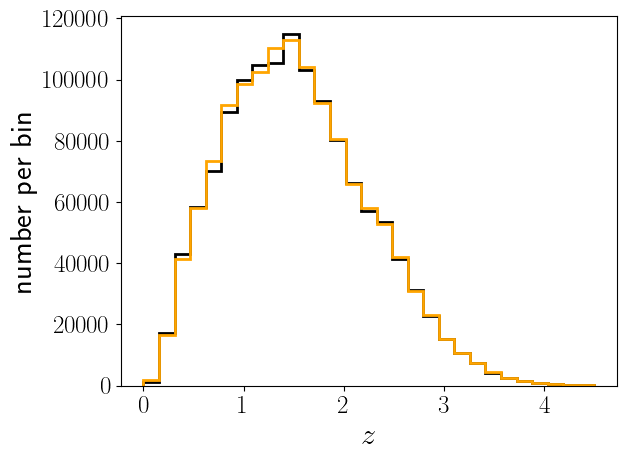

In [13]:
bins = np.linspace(0, 4.5, 30)
plt.hist(tab_quaia['redshift_quaia'], histtype='step', bins=bins, color='k', lw=2, label='Quaia')
plt.hist(tab_mock['redshift_quaia'], histtype='step', bins=bins, color='orange', lw=2, label='Mock')
plt.xlabel(r'$z$')
plt.ylabel('number per bin')

In [24]:
fac_stdev = 1.5

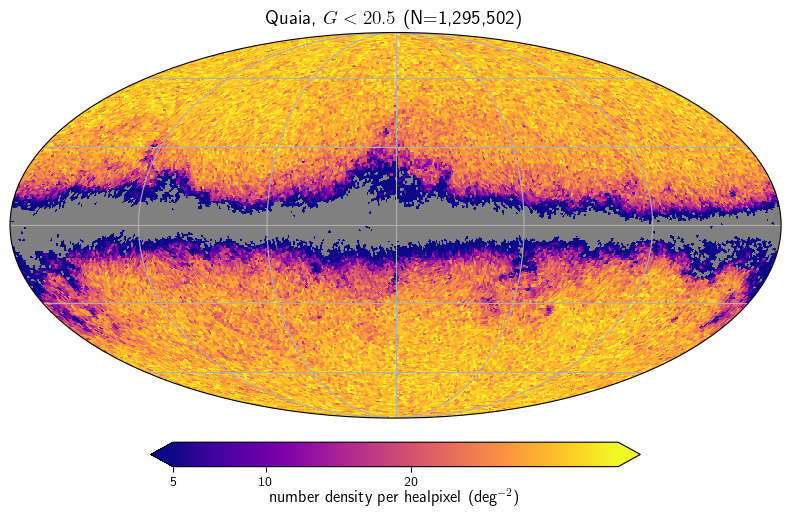

In [99]:
N_quaia = len(tab_quaia)

# Make map
pixel_indices_quaia = hp.ang2pix(NSIDE, tab_quaia['ra'], tab_quaia['dec'], lonlat=True)
map_quaia = np.bincount(pixel_indices_quaia, minlength=NPIX)

title_quaia = rf"Quaia, $G<{G_lim}$ (N={N_quaia:,})"
projview(map_quaia, title=title_quaia,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=max(0.1, np.median(map_quaia)-fac_stdev*np.std(map_quaia)), 
            max=np.median(map_quaia)+fac_stdev*np.std(map_quaia), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

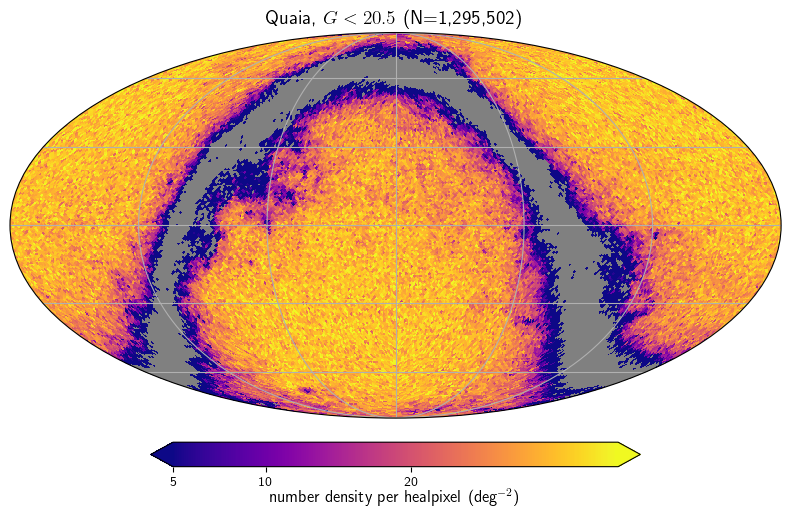

In [100]:
N_quaia = len(tab_quaia)

# Make map
pixel_indices_quaia = hp.ang2pix(NSIDE, tab_quaia['ra'], tab_quaia['dec'], lonlat=True)
map_quaia = np.bincount(pixel_indices_quaia, minlength=NPIX)

title_quaia = rf"Quaia, $G<{G_lim}$ (N={N_quaia:,})"
projview(map_quaia, title=title_quaia,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, #coord=['C', 'G'], 
            min=max(0.1, np.median(map_quaia)-fac_stdev*np.std(map_quaia)), 
            max=np.median(map_quaia)+fac_stdev*np.std(map_quaia), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

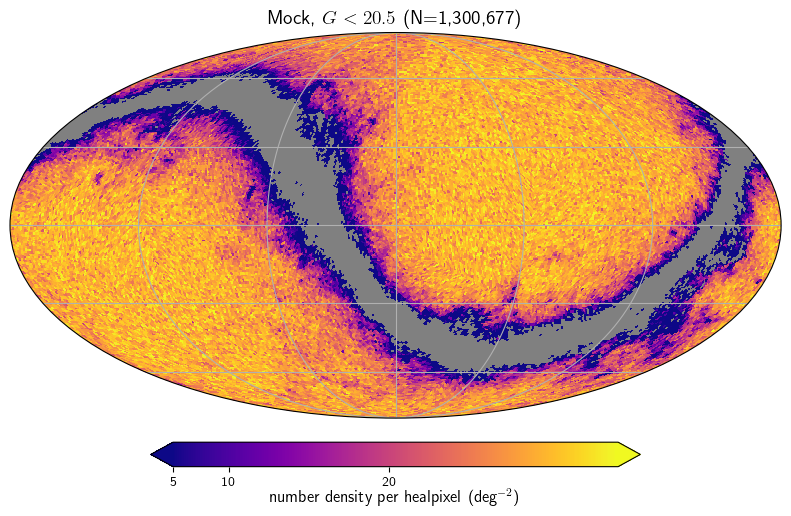

In [101]:
N_mock = len(tab_mock)

# Make map
pixel_indices_mock = hp.ang2pix(NSIDE, tab_mock['ra'], tab_mock['dec'], lonlat=True)
map_mock = np.bincount(pixel_indices_mock, minlength=NPIX)

title_mock = rf"Mock, $G<{G_lim}$ (N={N_mock:,})"
projview(map_mock, title=title_mock,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=max(0.1, np.median(map_mock)-fac_stdev*np.std(map_mock)), 
            max=np.median(map_mock)+fac_stdev*np.std(map_mock), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

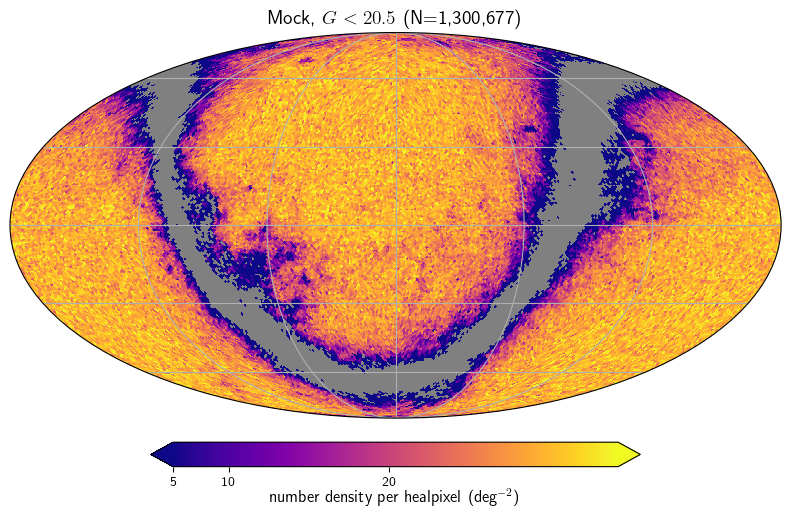

In [102]:
N_mock = len(tab_mock)

# Make map
pixel_indices_mock = hp.ang2pix(NSIDE, tab_mock['ra'], tab_mock['dec'], lonlat=True)
map_mock = np.bincount(pixel_indices_mock, minlength=NPIX)

title_mock = rf"Mock, $G<{G_lim}$ (N={N_mock:,})"
projview(map_mock, title=title_mock,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, #coord=['C', 'G'], 
            min=max(0.1, np.median(map_mock)-fac_stdev*np.std(map_mock)), 
            max=np.median(map_mock)+fac_stdev*np.std(map_mock), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

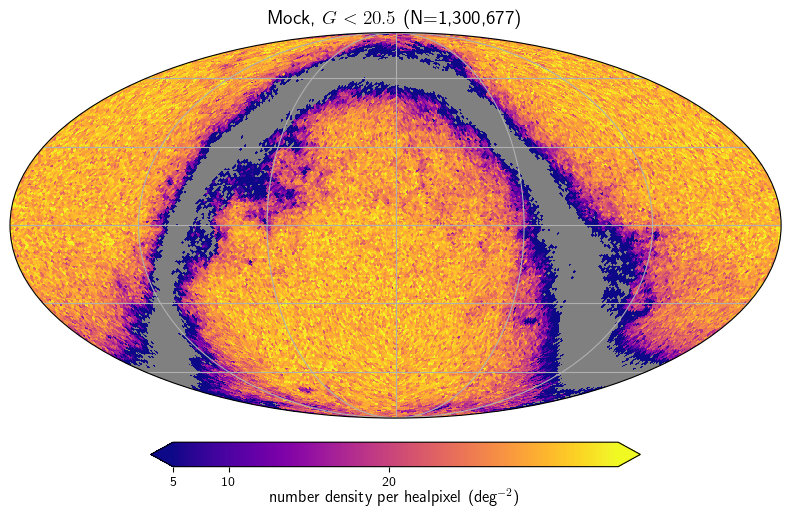

In [103]:
N_mock = len(tab_mock)

# Make map
pixel_indices_mock = hp.ang2pix(NSIDE, tab_mock['ra'], -1*tab_mock['dec'], lonlat=True)
map_mock = np.bincount(pixel_indices_mock, minlength=NPIX)

title_mock = rf"Mock, $G<{G_lim}$ (N={N_mock:,})"
projview(map_mock, title=title_mock,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, #coord=['C', 'G'], 
            min=max(0.1, np.median(map_mock)-fac_stdev*np.std(map_mock)), 
            max=np.median(map_mock)+fac_stdev*np.std(map_mock), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

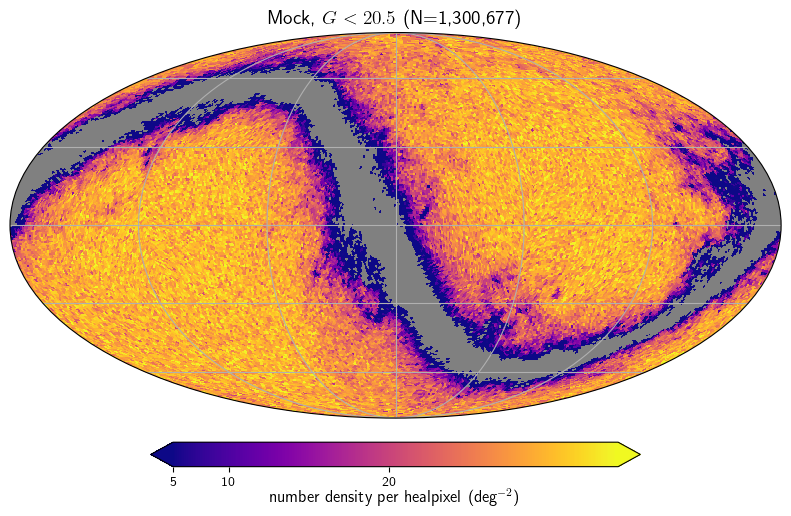

In [108]:
N_mock = len(tab_mock)

# Make map
pixel_indices_mock = hp.ang2pix(NSIDE, 180.0-tab_mock['ra'], -1*tab_mock['dec'], lonlat=True)
map_mock = np.bincount(pixel_indices_mock, minlength=NPIX)

title_mock = rf"Mock, $G<{G_lim}$ (N={N_mock:,})"
projview(map_mock, title=title_mock,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=max(0.1, np.median(map_mock)-fac_stdev*np.std(map_mock)), 
            max=np.median(map_mock)+fac_stdev*np.std(map_mock), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

In [106]:
np.min(tab_quaia['ra']), np.max(tab_quaia['ra']), np.min(tab_quaia['dec']), np.max(tab_quaia['dec'])

(0.00020748895937377105,
 359.99980021436215,
 -89.87093590941761,
 89.97172153446535)

In [107]:
np.min(tab_mock['ra']), np.max(tab_mock['ra']), np.min(tab_mock['dec']), np.max(tab_mock['dec'])

(-179.99980010328125, 179.9999230466863, -89.98909469237365, 89.99078857928782)

In [49]:
tab_mock['ra_shifted'] = tab_mock['ra'] + 180.
tab_mock['dec_shifted'] = -1*tab_mock['dec'] 

In [50]:
np.min(tab_mock['ra_shifted']), np.max(tab_mock['ra_shifted']), np.min(tab_mock['dec_shifted']), np.max(tab_mock['dec_shifted']),

(0.0001998967187546441,
 359.99992304668626,
 -89.99078857928782,
 89.98909469237365)

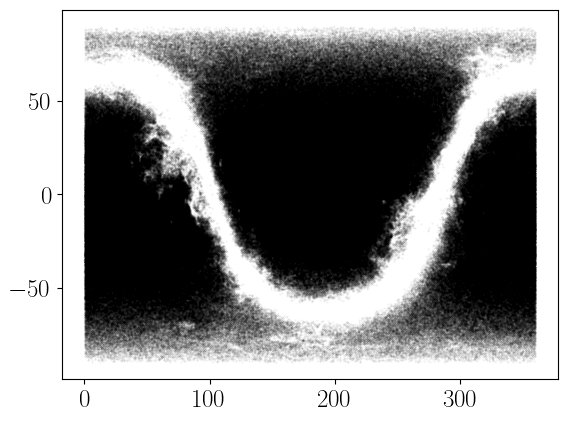

In [110]:
plt.scatter(tab_quaia['ra'], tab_quaia['dec'], color='k', s=0.1, alpha=0.1)

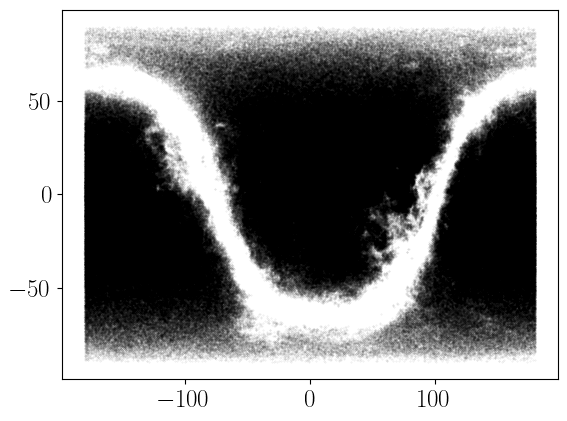

In [111]:
plt.scatter(tab_mock['ra'], tab_mock['dec'], color='k', s=0.1, alpha=0.1)

In [ ]:
plt.scatter(tab_mock['ra'], tab_mock['dec'], color='k', s=0.1, alpha=0.1)

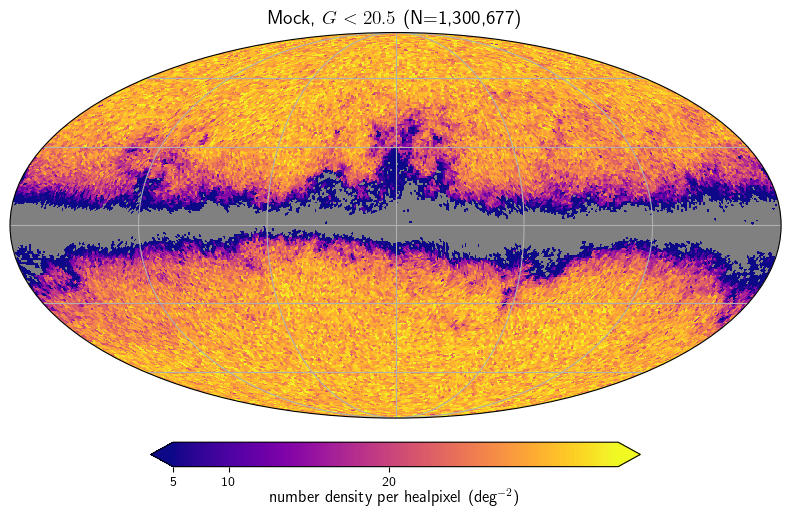

In [51]:
N_mock = len(tab_mock)

# Make map
pixel_indices_mock = hp.ang2pix(NSIDE, tab_mock['ra_shifted'], tab_mock['dec'], lonlat=True)
map_mock = np.bincount(pixel_indices_mock, minlength=NPIX)

title_mock = rf"Mock, $G<{G_lim}$ (N={N_mock:,})"
projview(map_mock, title=title_mock,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=max(0.1, np.median(map_mock)-fac_stdev*np.std(map_mock)), 
            max=np.median(map_mock)+fac_stdev*np.std(map_mock), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

In [72]:
coords_mock = SkyCoord(ra=tab_mock['ra_shifted']*u.deg, dec=tab_mock['dec']*u.deg, frame='icrs')

In [73]:
coords_mock_G = coords_mock.transform_to('galactic')

In [85]:
l_fixed = coords_mock_G.l + 180.0*u.deg
b_fixed = -1*coords_mock_G.b
coords_mock_G_fixed = SkyCoord(l=l_fixed, b=b_fixed, frame='galactic')

In [86]:
coords_mock_fixed = coords_mock_G_fixed.transform_to('icrs')

In [87]:
coords_mock_fixed

<SkyCoord (ICRS): (ra, dec) in deg
    [(108.4357076 ,  41.45139696), (  5.74678499,  -4.55727766),
     ( 49.88419098,  -0.68610451), ..., ( 91.61952915, -40.5247008 ),
     ( 35.41210271,  47.39269165), (129.84155461,  -2.330706  )]>

In [88]:
coords_mock_fixed.ra.value

array([108.4357076 ,   5.74678499,  49.88419098, ...,  91.61952915,
        35.41210271, 129.84155461])

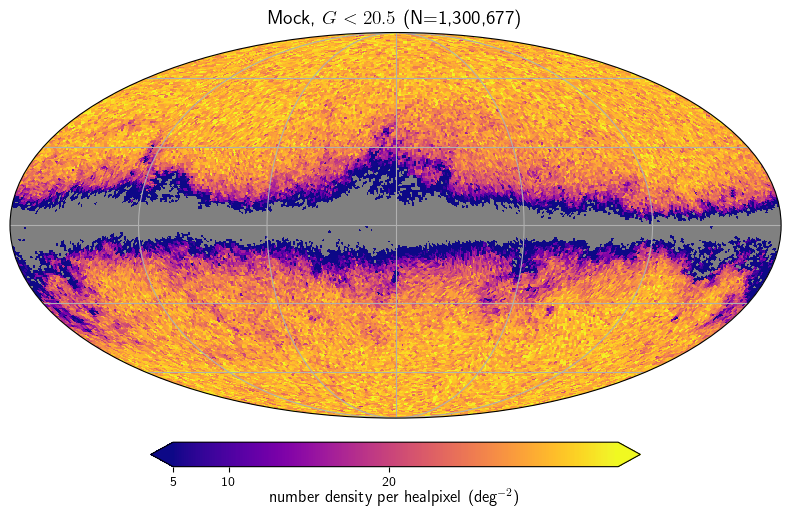

In [92]:
N_mock = len(tab_mock)

# Make map
pixel_indices_mock = hp.ang2pix(NSIDE, tab_mock['ra_fixed'], tab_mock['dec_fixed'], lonlat=True)
map_mock = np.bincount(pixel_indices_mock, minlength=NPIX)

title_mock = rf"Mock, $G<{G_lim}$ (N={N_mock:,})"
projview(map_mock, title=title_mock,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=max(0.1, np.median(map_mock)-fac_stdev*np.std(map_mock)), 
            max=np.median(map_mock)+fac_stdev*np.std(map_mock), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

In [121]:
tab_mock_clean = Table.read('../data/mock_catalog_quaia.fits')
tab_mock_fixed = tab_mock_clean.copy()
tab_mock_fixed['ra'] = coords_mock_fixed.ra.value
tab_mock_fixed['dec'] = coords_mock_fixed.dec.value
tab_mock_fixed['l'] = coords_mock_G_fixed.l
tab_mock_fixed['b'] = coords_mock_G_fixed.b

In [122]:
np.min(tab_quaia['ra']), np.max(tab_quaia['ra']), np.min(tab_quaia['dec']), np.max(tab_quaia['dec'])

(0.00020748895937377105,
 359.99980021436215,
 -89.87093590941761,
 89.97172153446535)

In [123]:
np.min(tab_mock_fixed['ra']), np.max(tab_mock_fixed['ra']), np.min(tab_mock_fixed['dec']), np.max(tab_mock_fixed['dec'])

(0.0013514449955777785,
 359.99993556062117,
 -89.9907885792878,
 89.98909469237365)

In [125]:
fn_mock_fixed = f'../data/mock_quaia_G{G_lim}.fits'
tab_mock_fixed.write(fn_mock_fixed, overwrite=True)

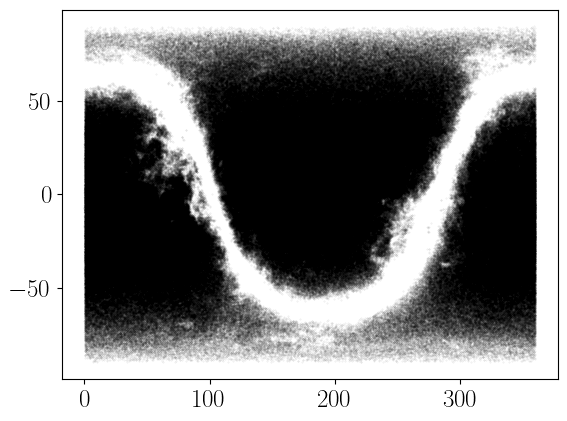

In [126]:
plt.scatter(tab_mock_fixed['ra'], tab_mock_fixed['dec'], color='k', s=0.1, alpha=0.1)

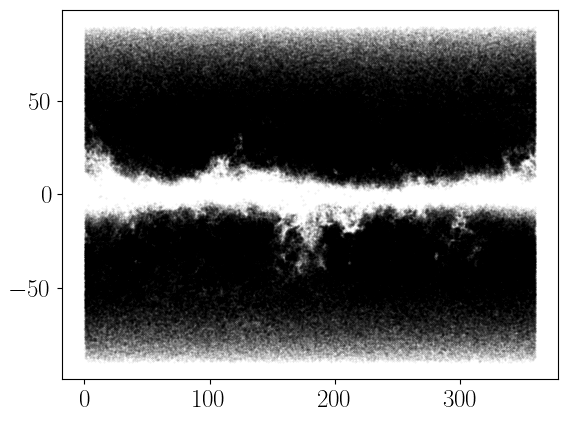

In [128]:
plt.scatter(tab_quaia['l'], tab_quaia['b'], color='k', s=0.1, alpha=0.1)

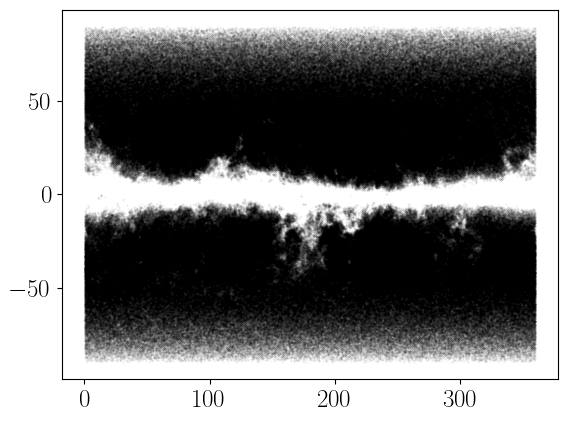

In [127]:
plt.scatter(tab_mock_fixed['l'], tab_mock_fixed['b'], color='k', s=0.1, alpha=0.1)